In [1]:
include("PVCR.jl");

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = get_nsrdb_sam_df() at retrieve_nsrdb_data.jl:92
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:92
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #get_nsrdb_sam_pv_output#73(::Bool, ::Function) at retrieve_nsrdb_data.jl:100
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:100


 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


## Change in residential tariff with new rules. Case with No PV
### Consumer 550 kWh/month

In [2]:
PVRes.capacity = 0.0
cnfl_residential.econsumption = 550; get_pmax(cnfl_residential);
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=false);

In [3]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=false)
end

In [4]:
bills_residential2 = Dict()
cnfl_residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], cnfl_residential; print_output=false, tax_cutoff = 0.0)
end

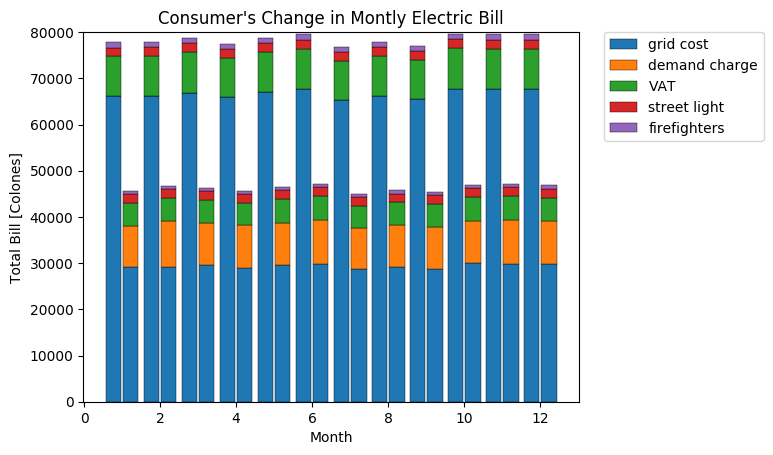

In [5]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

### Consumer 275 kWh/month

In [6]:
PVRes.capacity = 0.0
cnfl_residential.tariff = R_CNFL
cnfl_residential.econsumption = 275; get_pmax(cnfl_residential);
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=false);

In [7]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=false)
end

In [8]:
bills_residential2 = Dict()
cnfl_residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], cnfl_residential; print_output=false, tax_cutoff = 0.0)
end

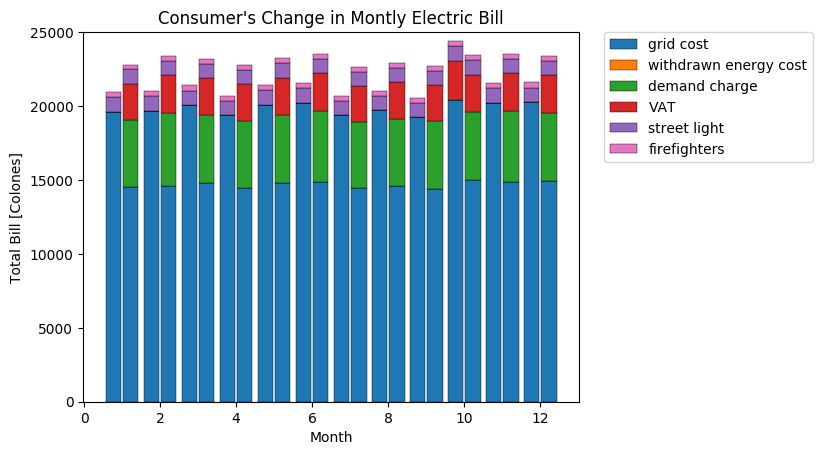

PyObject Text(0.5, 1, "Consumer's Change in Montly Electric Bill")

In [9]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"], 2)

## Change in residential tariff with new rules. PV System installed
### Consumer 550 kWh/month and 2 kW PV System

In [10]:
PVRes.capacity = 2
cnfl_residential.tariff = R_CNFL
cnfl_residential.econsumption = 550; get_pmax(cnfl_residential);
ebalance = annual_energy_balance(cnfl_residential, PVRes, print_output=false);

In [11]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], cnfl_residential, print_output=false)
end

In [12]:
bills_residential2 = Dict()
cnfl_residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], cnfl_residential; print_output=false, tax_cutoff = 0.0)
end

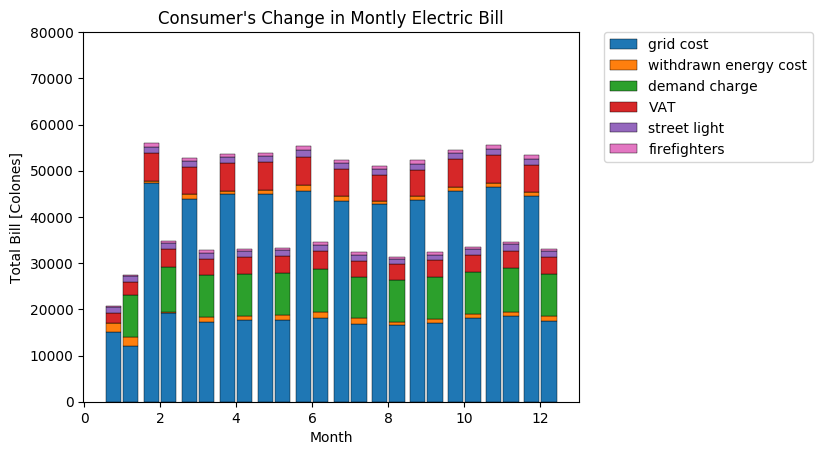

In [13]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

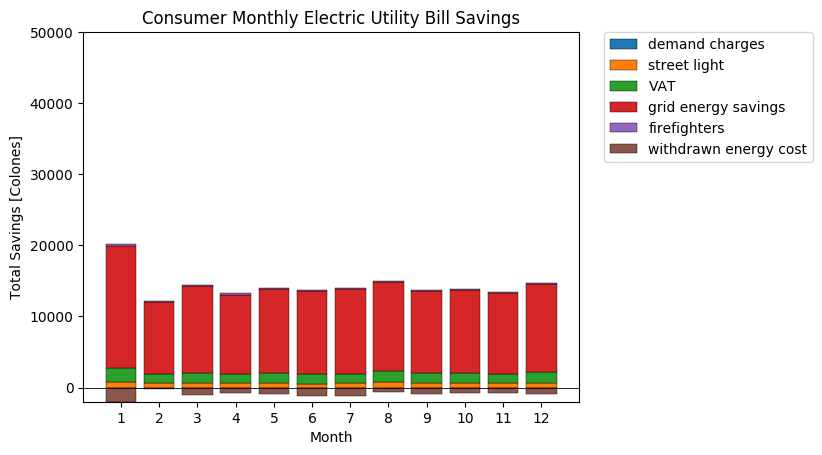

In [14]:
plot_savings(bills_residential2);

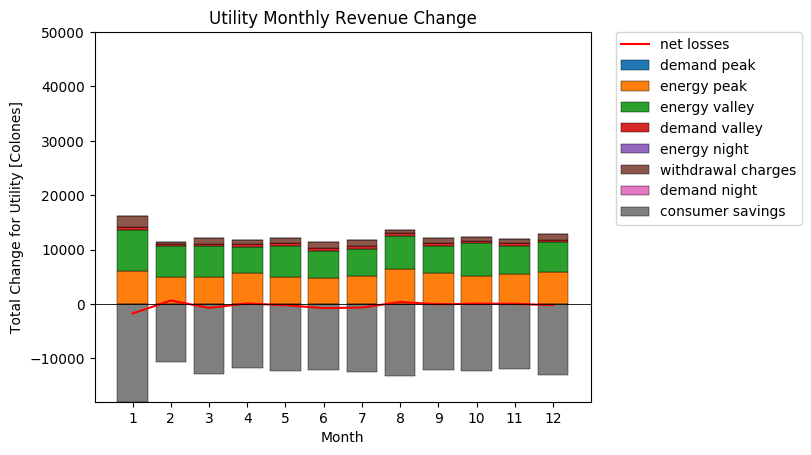

In [15]:
plot_utility_change(bills_residential2);

## Change in commercial tariff with new rules. Case with No PV
### Consumer 5000 kWh/month and No PV System

In [16]:
PVComInd.capacity = 0.0 
cnfl_commercial.tariff = CI_CNFL
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=false);

In [17]:
bills_commercial1 = Dict()
for m in 1:12
    bills_commercial1[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=false)
end

In [18]:
bills_commercial2 = Dict()
cnfl_commercial.tariff = A_CI_CNFL
for m in 1:12
    bills_commercial2[m] = monthly_bill(ebalance[m], cnfl_commercial; print_output=false)
end

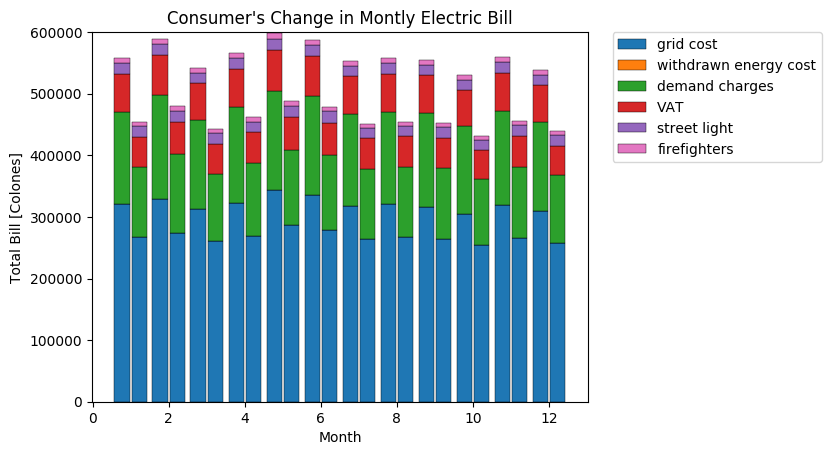

In [19]:
plot_bill(bills_commercial1, bills_commercial2, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

## Change in commercial tariff with new rules. PV System installed
### Consumer 5000 kWh/month and 21 kW PV System

In [20]:
PVComInd.capacity = 21.0 
cnfl_commercial.tariff = CI_CNFL
ebalance = annual_energy_balance(cnfl_commercial, PVComInd, print_output=false);

In [21]:
bills_commercial1 = Dict()
for m in 1:12
    bills_commercial1[m] = monthly_bill(ebalance[m], cnfl_commercial, print_output=false)
end

In [22]:
bills_commercial2 = Dict()
cnfl_commercial.tariff = A_CI_CNFL
for m in 1:12
    bills_commercial2[m] = monthly_bill(ebalance[m], cnfl_commercial; print_output=false)
end

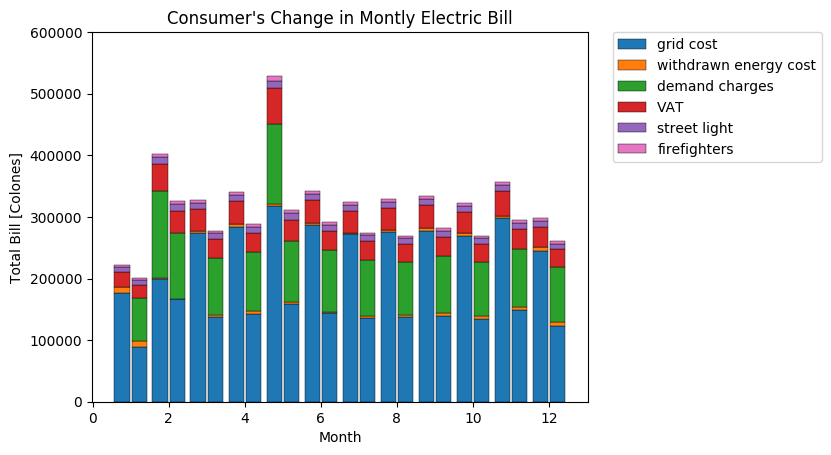

In [23]:
plot_bill(bills_commercial1, bills_commercial2, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"], 2);

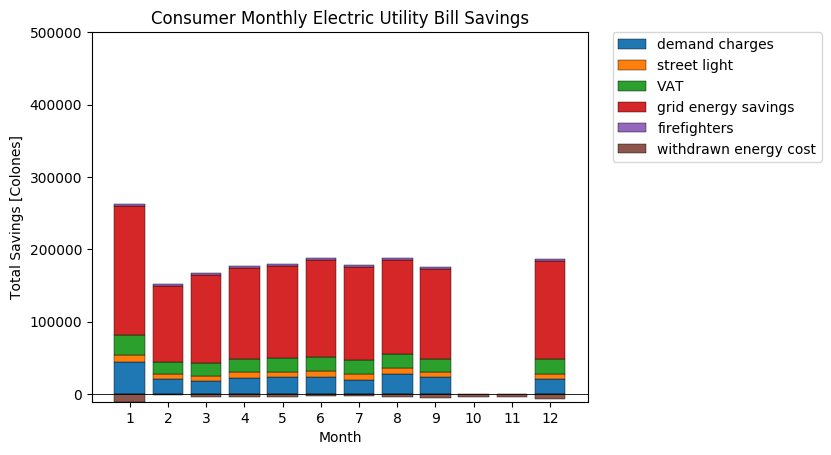

In [24]:
plot_savings(bills_commercial2);

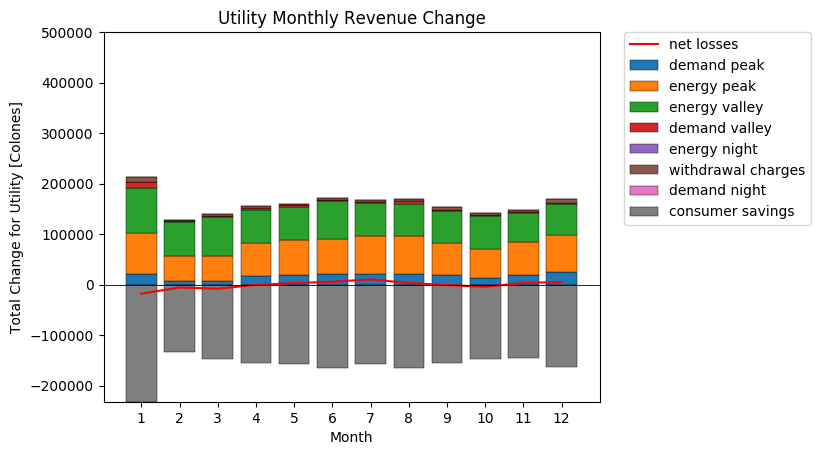

In [25]:
plot_utility_change(bills_commercial2);

## Change in medium voltage tariff with new rules. Case with No PV
### Consumer 20550 kWh/month and No PV System

In [26]:
PVTMT.capacity = 0.0 
cnfl_mediumvoltage.tariff = TMT_CNFL
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=false);

In [27]:
bills_TMT1 = Dict()
for m in 1:12
    bills_TMT1[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=false)
end

In [28]:
bills_TMT2 = Dict()
cnfl_mediumvoltage.tariff = A_TMT_CNFL
for m in 1:12
    bills_TMT2[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage; print_output=false)
end

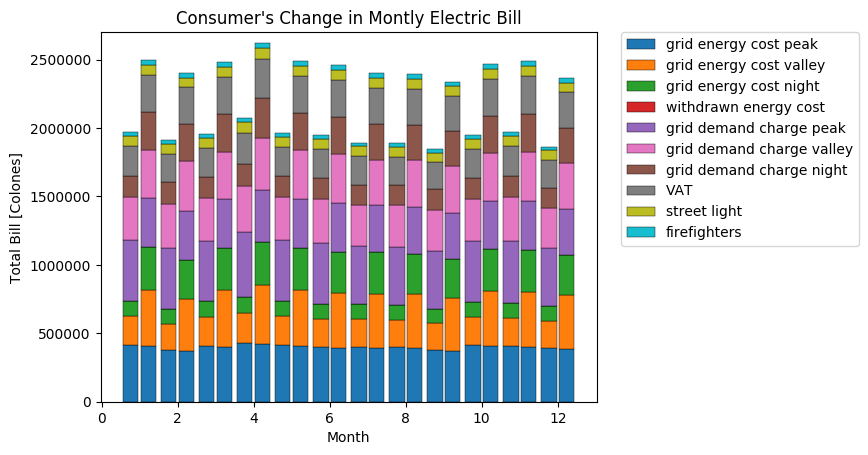

In [29]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT1, bills_TMT2, fields, 2);

## Change in medium voltage tariff with new rules. PV System installed
### Consumer 20550 kWh/month and 75 kW PV System

In [30]:
PVTMT.capacity = 75.0 
cnfl_mediumvoltage.tariff = TMT_CNFL
ebalance = annual_energy_balance(cnfl_mediumvoltage, PVTMT, print_output=false);

In [31]:
bills_TMT1 = Dict()
for m in 1:12
    bills_TMT1[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage, print_output=false)
end

In [32]:
bills_commercial2 = Dict()
cnfl_mediumvoltage.tariff = A_TMT_CNFL
for m in 1:12
    bills_TMT2[m] = monthly_bill(ebalance[m], cnfl_mediumvoltage; print_output=false)
end

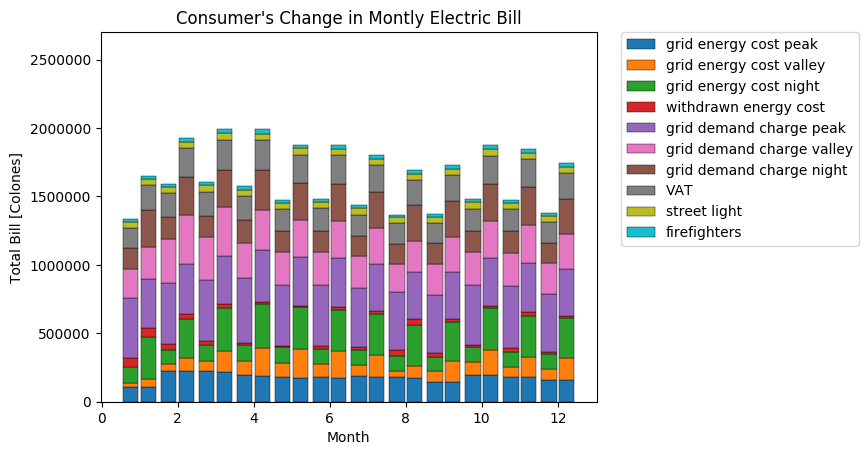

In [33]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT1, bills_TMT2, fields, 2);

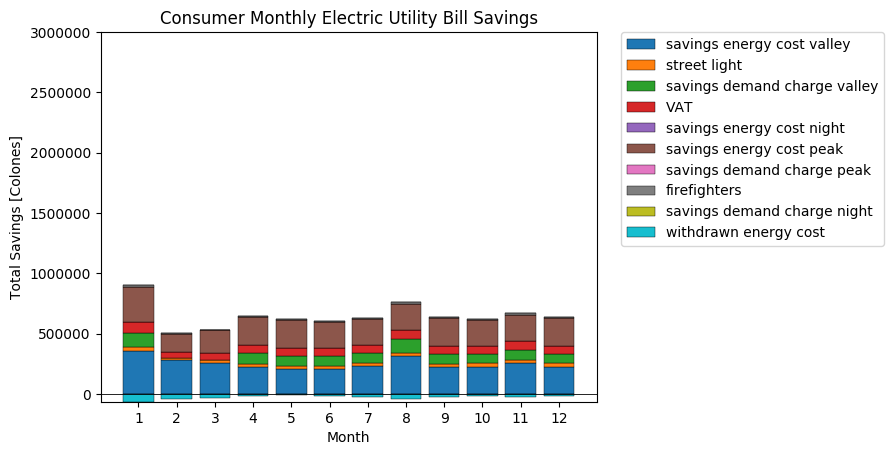

In [34]:
plot_savings(bills_TMT2);

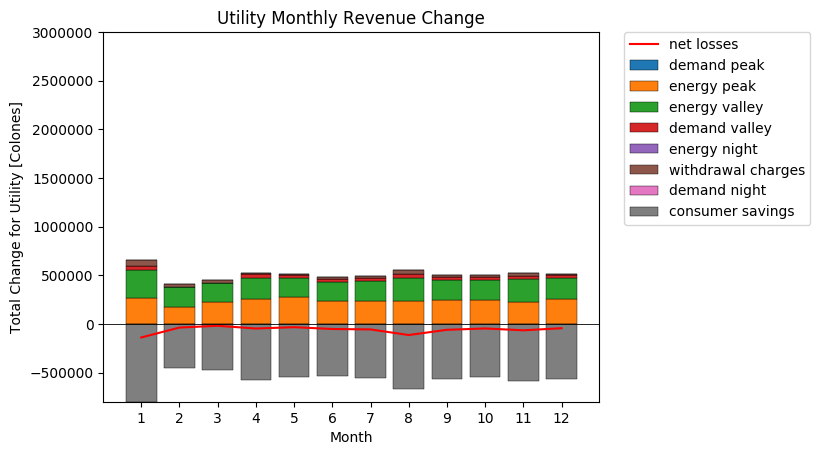

In [35]:
plot_utility_change(bills_TMT2);